In [1]:
from model import Item, Categories, SaleItem





cat1 = Categories('03-06-2024','cat_001','Local coffee')

i1 = Item ('12-06-2024','i_001','super_coffee',"0000",3900,3500,cat1)
i2 = Item ('17-06-2024','i_002','sunday_coffee',"0000",3450,3000,cat1)
i3 = Item ('01-06-2024','i_003','hsu_coffee',"0000",5450,5200,cat1)




In [26]:
from model import SaleItem


sale1=  SaleItem(customer_id='CU_000001',created_date='15-06-2024',item=i1 )
sale2=  SaleItem(customer_id='CU_000001',created_date='21-06-2024',item=i1 )
sale3=  SaleItem(customer_id='CU_000001',created_date='21-06-2024',item=i2 )
sale4=  SaleItem(customer_id='CU_000001',created_date='21-06-2024',item=i3 )
sale5=  SaleItem(customer_id='CU_000001',created_date='01-07-2024',item=i2 )
sale6=  SaleItem(customer_id='CU_000001',created_date='01-07-2024',item=i1 )
sale7=  SaleItem(customer_id='CU_000001',created_date='10-07-2024',item=i3 )
sale8=  SaleItem(customer_id='CU_000001',created_date='10-07-2024',item=i2 )
sale9=  SaleItem(customer_id='CU_000001',created_date='10-07-2024',item=i3 )
total_sale = [sale1,sale2,sale3,sale4,sale5,sale6,sale7,sale8,sale9]

In [27]:
sale_item_dict = {
    "created_date" :[],
    "item_name" :[],
    "profit" : [],
    "category_name" : []
}
for cur_obj in total_sale:
    sale_item_dict["created_date"].append(cur_obj.created_date)
    sale_item_dict["item_name"].append(cur_obj.item.name)
    sale_item_dict["profit"].append(cur_obj.item.getProfit())
    sale_item_dict["category_name"].append(cur_obj.item.category.name)


import pandas as pd
sale_item_df = pd.DataFrame(sale_item_dict)
sale_item_df

,created_date,item_name,profit,category_name
0,15-06-2024,super_coffee,400,Local coffee
1,21-06-2024,super_coffee,400,Local coffee
2,21-06-2024,sunday_coffee,450,Local coffee
3,21-06-2024,hsu_coffee,250,Local coffee
4,01-07-2024,sunday_coffee,450,Local coffee
5,01-07-2024,super_coffee,400,Local coffee
6,10-07-2024,hsu_coffee,250,Local coffee
7,10-07-2024,sunday_coffee,450,Local coffee
8,10-07-2024,hsu_coffee,250,Local coffee


In [28]:
dist_item_name = set(sale_item_df["item_name"].to_numpy())
print(dist_item_name)

{'sunday_coffee', 'hsu_coffee', 'super_coffee'}


  created_date      item_name  profit category_name
2   21-06-2024  sunday_coffee     450  Local coffee
4   01-07-2024  sunday_coffee     450  Local coffee
7   10-07-2024  sunday_coffee     450  Local coffee
  created_date   item_name  profit category_name
3   21-06-2024  hsu_coffee     250  Local coffee
6   10-07-2024  hsu_coffee     250  Local coffee
8   10-07-2024  hsu_coffee     250  Local coffee
  created_date     item_name  profit category_name
0   15-06-2024  super_coffee     400  Local coffee
1   21-06-2024  super_coffee     400  Local coffee
5   01-07-2024  super_coffee     400  Local coffee


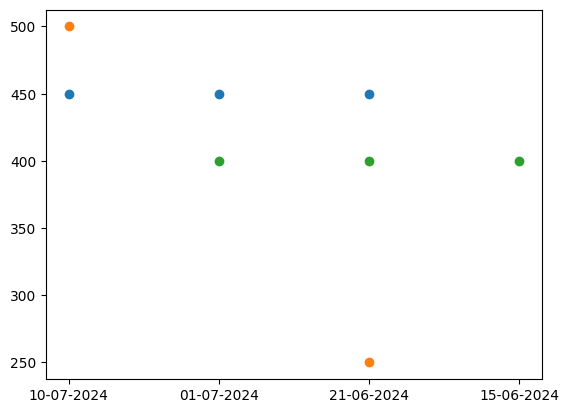

In [30]:
import matplotlib.pyplot as plt
import numpy as np
for cur_name in dist_item_name:
    cur_df = sale_item_df[sale_item_df['item_name'] == cur_name]

    
    
    print(cur_df.head())

    # we need dist date for analysis
    x =  list(set(cur_df["created_date"].to_numpy()))

    # profit must be sum for same date
    y = []
    for cur_x in x:
        temp_y = cur_df[cur_df['created_date']==cur_x]['profit'].to_numpy()
        y.append(np.sum(temp_y))

    #print(x)
    #print(y)
    plt.scatter(x,y)
    
plt.show()
